# Text Processing

## 1. Capturing Text Data

There are 3 diffrent ways for loading the data.

### 1.1 Plain Text

<img src = './assets/plain_texts.png'>

In [2]:
import os

# Read in a plain text file
with open(os.path.join("data", "hieroglyph.txt"), "r") as f:
    text = f.read()
    print(text)

Hieroglyphic writing dates from c. 3000 BC, and is composed of hundreds of symbols. A hieroglyph can represent a word, a sound, or a silent determinative; and the same symbol can serve different purposes in different contexts. Hieroglyphs were a formal script, used on stone monuments and in tombs, that could be as detailed as individual works of art.



### 1.2 Tabular Data

<img src = './assets/tabular_datas.png'>

In [3]:
import pandas as pd

# Extract text column from a dataframe
df = pd.read_csv(os.path.join("data", "news.csv"))
df.head()[['publisher', 'title']]

# Convert text column to lowercase
df['title'] = df['title'].str.lower()
df.head()[['publisher', 'title']]

,publisher,title
0,Livemint,fed's charles plosser sees high bar for change...
1,IFA Magazine,us open: stocks fall after fed official hints ...
2,IFA Magazine,"fed risks falling 'behind the curve', charles ..."
3,Moneynews,fed's plosser: nasty weather has curbed job gr...
4,NASDAQ,plosser: fed may have to accelerate tapering pace


### 1.3 Online Resource

Online resources are website's API which they usually have a 'json' or 'xml' format, choose accordingly.

<img src = './assets/online_resources.png'>

In [4]:
import requests
import json
# import xml

# Fetch data from a REST API
r = requests.get(
    "https://quotes.rest/qod.json")
res = r.json()
print(json.dumps(res, indent=4))

{
    "success": {
        "total": 1
    },
    "contents": {
        "quotes": [
            {
                "quote": "Successful people appear to be traveling along one continual, successful road. What is not apparent is the perseverance it takes following each defeat to keep you on that road. No one I know of has ever experienced one success after another without defeats, failures, disappointments, and frustrations galore along the way. Learning to overcome those times of agony is what separates the winners from the losers.",
                "length": "412",
                "author": "G. Kingsley Ward",
                "tags": [
                    "failure",
                    "inspire",
                    "perseverance",
                    "success",
                    "winning"
                ],
                "category": "inspire",
                "date": "2018-04-23",
                "permalink": "https://theysaidso.com/quote/5dCTjGryXcEf_OQaDIIR4AeF/g-kingsley-ward-su

In [5]:
# Extract relevant object and field
q = res["contents"]["quotes"][0]
print(q["quote"], "\n--", q["author"])

Successful people appear to be traveling along one continual, successful road. What is not apparent is the perseverance it takes following each defeat to keep you on that road. No one I know of has ever experienced one success after another without defeats, failures, disappointments, and frustrations galore along the way. Learning to overcome those times of agony is what separates the winners from the losers. 
-- G. Kingsley Ward


## 2. Cleaning

In [6]:
import requests

# Fetch a web page
r = requests.get("https://news.ycombinator.com")
print(r.text)

<html op="news"><head><meta name="referrer" content="origin"><meta name="viewport" content="width=device-width, initial-scale=1.0"><link rel="stylesheet" type="text/css" href="news.css?aWzYZ4rkLUAr1wN52yaW">
            <link rel="shortcut icon" href="favicon.ico">
          <link rel="alternate" type="application/rss+xml" title="RSS" href="rss">
        <title>Hacker News</title></head><body><center><table id="hnmain" border="0" cellpadding="0" cellspacing="0" width="85%" bgcolor="#f6f6ef">
        <tr><td bgcolor="#ff6600"><table border="0" cellpadding="0" cellspacing="0" width="100%" style="padding:2px"><tr><td style="width:18px;padding-right:4px"><a href="https://news.ycombinator.com"><img src="y18.gif" width="18" height="18" style="border:1px white solid;"></a></td>
                  <td style="line-height:12pt; height:10px;"><span class="pagetop"><b class="hnname"><a href="news">Hacker News</a></b>
              <a href="newest">new</a> | <a href="newcomments">comments</a> | <a h

In [7]:
import re

# Remove HTML tags using RegEx
pattern = re.compile(r'<.*?>')  # tags look like <...>
print(pattern.sub('', r.text))  # replace them with blank


            
          
        Hacker News
        
                  Hacker News
              new | comments | show | ask | jobs | submit            
                              login
                          
              

              
      1.      Bringing Objective-C to the Amiga (heap.zone)
        40 points by Midar 2 hours ago  | hide | 20&nbsp;comments              
      
                
      2.      Renting Is Throwing Money Away  Right? (affordanything.com)
        44 points by vinnyglennon 3 hours ago  | hide | 12&nbsp;comments              
      
                
      3.      You probably don't need AI/ML. You can make do with well written SQL scripts (threadreaderapp.com)
        81 points by passenger 5 hours ago  | hide | 25&nbsp;comments              
      
                
      4.      A blockchain is a specific set of choices suitable for a narrow set of use-cases (threadreaderapp.com)
        204 points by BerislavLopac 8 hours ago  | hide | 135&nbs

In [8]:
from bs4 import BeautifulSoup

# Remove HTML tags using Beautiful Soup library
soup = BeautifulSoup(r.text, "html5lib")
print(soup.get_text())


            
          
        Hacker News
        
                  Hacker News
              new | comments | show | ask | jobs | submit            
                              login
                          
              

              
      1.      Bringing Objective-C to the Amiga (heap.zone)
        40 points by Midar 2 hours ago  | hide | 20 comments              
      
                
      2.      Renting Is Throwing Money Away  Right? (affordanything.com)
        44 points by vinnyglennon 3 hours ago  | hide | 12 comments              
      
                
      3.      You probably don't need AI/ML. You can make do with well written SQL scripts (threadreaderapp.com)
        81 points by passenger 5 hours ago  | hide | 25 comments              
      
                
      4.      A blockchain is a specific set of choices suitable for a narrow set of use-cases (threadreaderapp.com)
        204 points by BerislavLopac 8 hours ago  | hide | 135 comments          

In [9]:
"""
# Find all course summaries
summaries = soup.find_all("div", class_="course-summary-card")
summaries[0]
"""

'\n# Find all course summaries\nsummaries = soup.find_all("div", class_="course-summary-card")\nsummaries[0]\n'

In [10]:
# Find all articles
summaries = soup.find_all("tr", class_="athing")
summaries[0]

<tr class="athing" id="16899658">
      <td align="right" class="title" valign="top"><span class="rank">1.</span></td>      <td class="votelinks" valign="top"><center><a href="vote?id=16899658&amp;how=up&amp;goto=news" id="up_16899658"><div class="votearrow" title="upvote"></div></a></center></td><td class="title"><a class="storylink" href="https://heap.zone/blog/?76">Bringing Objective-C to the Amiga</a><span class="sitebit comhead"> (<a href="from?site=heap.zone"><span class="sitestr">heap.zone</span></a>)</span></td></tr>

In [11]:
"""
# Extract title
summaries[0].select_one("h3 a").get_text().strip()
"""

'\n# Extract title\nsummaries[0].select_one("h3 a").get_text().strip()\n'

In [12]:
# Extract title
summaries[0].find("a", class_="storylink").get_text().strip()

'Bringing Objective-C to the Amiga'

In [13]:
"""
# Extract description
summaries[0].select_one("div[data-course-short-summary]").get_text().strip()
"""

'\n# Extract description\nsummaries[0].select_one("div[data-course-short-summary]").get_text().strip()\n'

In [14]:

"""
# Find all course summaries, extract title and description
courses = []
summaries = soup.find_all("div", class_="course-summary-card")
for summary in summaries:
    title = summary.select_one("h3 a").get_text().strip()
    description = summary.select_one("div[data-course-short-summary]").get_text().strip()
    courses.append((title, description))

print(len(courses), "course summaries found. Sample:")
print(courses[0][0])
print(courses[0][1])
"""

'\n# Find all course summaries, extract title and description\ncourses = []\nsummaries = soup.find_all("div", class_="course-summary-card")\nfor summary in summaries:\n    title = summary.select_one("h3 a").get_text().strip()\n    description = summary.select_one("div[data-course-short-summary]").get_text().strip()\n    courses.append((title, description))\n\nprint(len(courses), "course summaries found. Sample:")\nprint(courses[0][0])\nprint(courses[0][1])\n'

In [15]:
# Find all articles, extract titles
articles = []
summaries = soup.find_all("tr", class_="athing")
for summary in summaries:
    title = summary.find("a", class_="storylink").get_text().strip()
    articles.append((title))

print(len(articles), "Article summaries found. Sample:")
print(articles[0])

30 Article summaries found. Sample:
Bringing Objective-C to the Amiga


## Normalization

### Case Normalization

In [16]:
# Sample text
text = "The first time you see The Second Renaissance it may look boring. Look at it at least twice and definitely watch part 2. It will change your view of the matrix. Are the human people the ones who started the war ? Is AI a bad thing ?"
print(text)

The first time you see The Second Renaissance it may look boring. Look at it at least twice and definitely watch part 2. It will change your view of the matrix. Are the human people the ones who started the war ? Is AI a bad thing ?


In [17]:
# Convert to lowercase
text = text.lower() 
print(text)

the first time you see the second renaissance it may look boring. look at it at least twice and definitely watch part 2. it will change your view of the matrix. are the human people the ones who started the war ? is ai a bad thing ?


### Punctuation Removal

In [18]:
import re

# Remove punctuation characters
text = re.sub(r"[^a-zA-Z0-9]", " ", text) 
print(text)

the first time you see the second renaissance it may look boring  look at it at least twice and definitely watch part 2  it will change your view of the matrix  are the human people the ones who started the war   is ai a bad thing  


## Tokenization

In [19]:
# Split text into tokens (words)
words = text.split()
print(words)

['the', 'first', 'time', 'you', 'see', 'the', 'second', 'renaissance', 'it', 'may', 'look', 'boring', 'look', 'at', 'it', 'at', 'least', 'twice', 'and', 'definitely', 'watch', 'part', '2', 'it', 'will', 'change', 'your', 'view', 'of', 'the', 'matrix', 'are', 'the', 'human', 'people', 'the', 'ones', 'who', 'started', 'the', 'war', 'is', 'ai', 'a', 'bad', 'thing']


### NLTK: Natural Language ToolKit

In [20]:
# Another sample text
text = "Dr. Smith graduated from the University of Washington. He later started an analytics firm called Lux, which catered to enterprise customers."
print(text)

Dr. Smith graduated from the University of Washington. He later started an analytics firm called Lux, which catered to enterprise customers.


In [21]:
from nltk.tokenize import word_tokenize

# Split text into words using NLTK
words = word_tokenize(text)
print(words)

['Dr.', 'Smith', 'graduated', 'from', 'the', 'University', 'of', 'Washington', '.', 'He', 'later', 'started', 'an', 'analytics', 'firm', 'called', 'Lux', ',', 'which', 'catered', 'to', 'enterprise', 'customers', '.']


In [22]:
from nltk.tokenize import sent_tokenize

# Split text into sentences
sentences = sent_tokenize(text)
print(sentences)

['Dr. Smith graduated from the University of Washington.', 'He later started an analytics firm called Lux, which catered to enterprise customers.']


In [23]:
# List stop words
from nltk.corpus import stopwords
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [24]:
# Reset text
text = "The first time you see The Second Renaissance it may look boring. Look at it at least twice and definitely watch part 2. It will change your view of the matrix. Are the human people the ones who started the war ? Is AI a bad thing ?"

# Normalize it
text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())

# Tokenize it
words = text.split()
print(words)

['the', 'first', 'time', 'you', 'see', 'the', 'second', 'renaissance', 'it', 'may', 'look', 'boring', 'look', 'at', 'it', 'at', 'least', 'twice', 'and', 'definitely', 'watch', 'part', '2', 'it', 'will', 'change', 'your', 'view', 'of', 'the', 'matrix', 'are', 'the', 'human', 'people', 'the', 'ones', 'who', 'started', 'the', 'war', 'is', 'ai', 'a', 'bad', 'thing']


In [25]:
# Remove stop words
words = [w for w in words if w not in stopwords.words("english")]
print(words)

['first', 'time', 'see', 'second', 'renaissance', 'may', 'look', 'boring', 'look', 'least', 'twice', 'definitely', 'watch', 'part', '2', 'change', 'view', 'matrix', 'human', 'people', 'ones', 'started', 'war', 'ai', 'bad', 'thing']


## Part-of-Speech Tagging

In [26]:
from nltk import pos_tag

# Tag parts of speech (PoS)
sentence = word_tokenize("I always lie down to tell a lie.")
pos_tag(sentence)

[('I', 'PRP'),
 ('always', 'RB'),
 ('lie', 'VBP'),
 ('down', 'RP'),
 ('to', 'TO'),
 ('tell', 'VB'),
 ('a', 'DT'),
 ('lie', 'NN'),
 ('.', '.')]

### Sentence Parsing

In [27]:
import nltk

# Define a custom grammar
my_grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
""")
parser = nltk.ChartParser(my_grammar)

# Parse a sentence
sentence = word_tokenize("I shot an elephant in my pajamas")
for tree in parser.parse(sentence):
    print(tree)

(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))
(S
  (NP I)
  (VP
    (V shot)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))


In [28]:
# checking the tags
from nltk.data import load
tagdict = load('help/tagsets/upenn_tagset.pickle')
tagdict['NN'][0]

'noun, common, singular or mass'

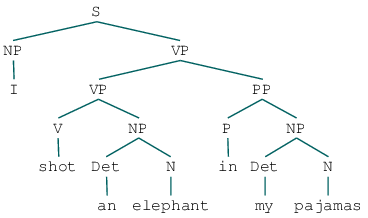

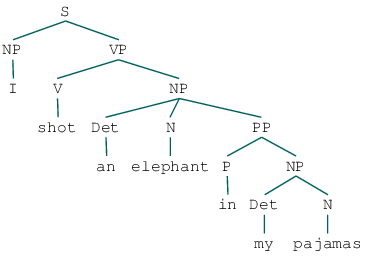

In [29]:
import IPython  # for displaying parse trees inline

# Visualize parse trees
for tree in parser.parse(sentence):
    IPython.display.display(tree)  # instead of tree.draw()

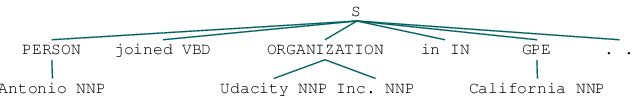

In [30]:
from nltk import pos_tag, ne_chunk
from nltk.tokenize import word_tokenize

# Recognize named entities in a tagged sentence
tree = ne_chunk(pos_tag(word_tokenize("Antonio joined Udacity Inc. in California.")))
IPython.display.display(tree)

## Stemming & Lemmatization

### Stemming

In [31]:
from nltk.stem.porter import PorterStemmer

# Reduce words to their stems
stemmed = [PorterStemmer().stem(w) for w in words]
print(stemmed)

['first', 'time', 'see', 'second', 'renaiss', 'may', 'look', 'bore', 'look', 'least', 'twice', 'definit', 'watch', 'part', '2', 'chang', 'view', 'matrix', 'human', 'peopl', 'one', 'start', 'war', 'ai', 'bad', 'thing']


### Lemmatization

In [32]:
from nltk.stem.wordnet import WordNetLemmatizer

# Reduce words to their root form
lemmed = [WordNetLemmatizer().lemmatize(w) for w in words]
print(lemmed)

['first', 'time', 'see', 'second', 'renaissance', 'may', 'look', 'boring', 'look', 'least', 'twice', 'definitely', 'watch', 'part', '2', 'change', 'view', 'matrix', 'human', 'people', 'one', 'started', 'war', 'ai', 'bad', 'thing']


In [33]:
# Lemmatize verbs by specifying pos
lemmed = [WordNetLemmatizer().lemmatize(w, pos='v') for w in lemmed] # The dafault is only for nouns, by putting pos='v', verbs will be converted as well/
print(lemmed)

['first', 'time', 'see', 'second', 'renaissance', 'may', 'look', 'bore', 'look', 'least', 'twice', 'definitely', 'watch', 'part', '2', 'change', 'view', 'matrix', 'human', 'people', 'one', 'start', 'war', 'ai', 'bad', 'thing']
